In [93]:
import pandas as pd
%matplotlib inline
#notebook
import numpy as np
import matplotlib.pyplot as plt
import plotto
import imp
import ragagnin2018
%run ragagnin2018.ipynb

imp.reload(plotto)
ureg = plotto.ureg()
simul = plotto.query("/tmp/antonio/magneticum.sql")
ureg.define('hubble = %f'%(simul("select h from simulation").h[0]))



In [5]:
simul ("""
            select snap.id as snap_id,*
            from simulation
            inner join snap on snap.simulation_id=simulation.id
            inner join (
                select fof.snap_id as id,count(*) as count
                from fof
                where resolvness > 0
                group by fof.snap_id
            ) as A on A.id = snap.id
       """)


,snap_id,id,name,box_size,h,id,name,redshift,a,simulation_id,tag,id,count
0,1,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,1,037,2.220446e-16,1.000000,1,z0,1,26149
1,2,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,2,025,4.701941e-01,0.680182,1,z05,2,7206
2,3,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,3,014,1.178895e+00,0.458948,1,z1,3,222
3,4,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,4,012,1.477581e+00,0.403619,1,z15,4,29
4,6,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,6,031,2.520891e-01,0.798665,2,z0,6,156110
5,7,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,7,026,4.701941e-01,0.680182,2,z05,7,146339
6,8,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,8,015,1.178895e+00,0.458948,2,z1,8,99669
7,9,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,9,012,1.706354e+00,0.369501,2,z15,9,63542
8,10,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,10,011,1.980082e+00,0.335561,2,z2,10,48925
9,11,3,/HydroSims/Magneticum/Box4/uhr_test/,48000.0,0.704,11,136,6.634019e-02,0.937787,3,z0,11,1845


In [96]:
all_df_z0 = simul (" select * from fof inner join snap on fof.snap_id=snap.id where resolvness = 1   and snap.tag='z0' and snap.id=6  ")






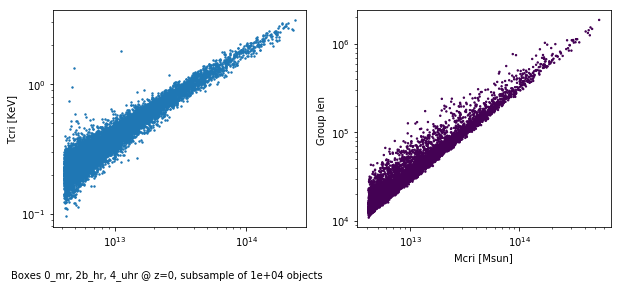

In [97]:
n_subsample = 10000
rdf = all_df_z0.sample(n=n_subsample)
f,a12 = plt.subplots(1,2, figsize=(10,4))
a1=a12[0]
a2=a12[1]
f.subplots_adjust(hspace=0)
a1.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.tgas4,s=2) #c=rdf.redshift, s=2)
a1.set_xscale('log')
a1.set_yscale('log')
a2.set_xlabel("Mcri [Msun]")
a1.set_ylabel("Tcri [KeV]")
a1.set_ylabel("Tcri [KeV]")

a2.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.glen,c=rdf.resolvness, s=2) #c=rdf.redshift, s=2)
a2.set_xscale('log')
a2.set_yscale('log')
a2.set_xlabel("Mcri [Msun]")
a2.set_ylabel("Group len ")
f.text(.5, -0.05, "Boxes 0_mr, 2b_hr, 4_uhr @ z=0, subsample of %.0e objects"%(n_subsample), ha='right')

None

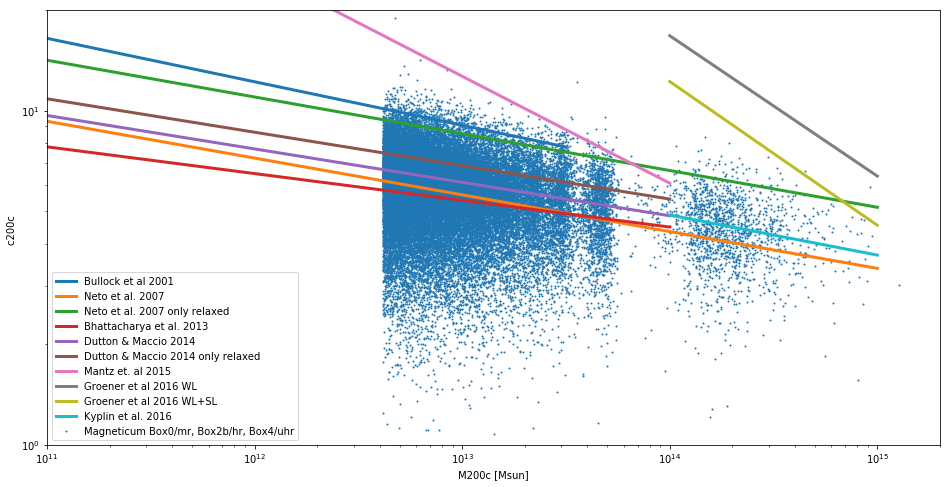

In [98]:
def sc(c0,a):
    return lambda x: c0*(x/8.e14)**a

def set_Mc_lims(a):
    a.set_xscale('log')
    a.set_xlim([1e11,2e15])
    a.set_ylim([1,20])
    a.set_yscale('log')
    a.set_xlabel("M200c [Msun]")
    a.set_ylabel("c200c ")
    a.legend()
    
fig,a = plt.subplots(1,1, figsize=(16,8))
df=all_df_z0#.sample(n=100000)
#colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, s=1, label='Magneticum Box0/mr, Box2b/hr, Box4/uhr') #c=rdf.redshift, s=2)

for interp_observation_name in interp_observations:
        obs = interp_observations[interp_observation_name]
        x = np.logspace(obs.xrange[0],obs.xrange[1],3)
        
        y = sc(obs.c8e14,obs.B)(x)
        a.plot(x,y, linewidth=3, label=interp_observation_name)

set_Mc_lims(a)


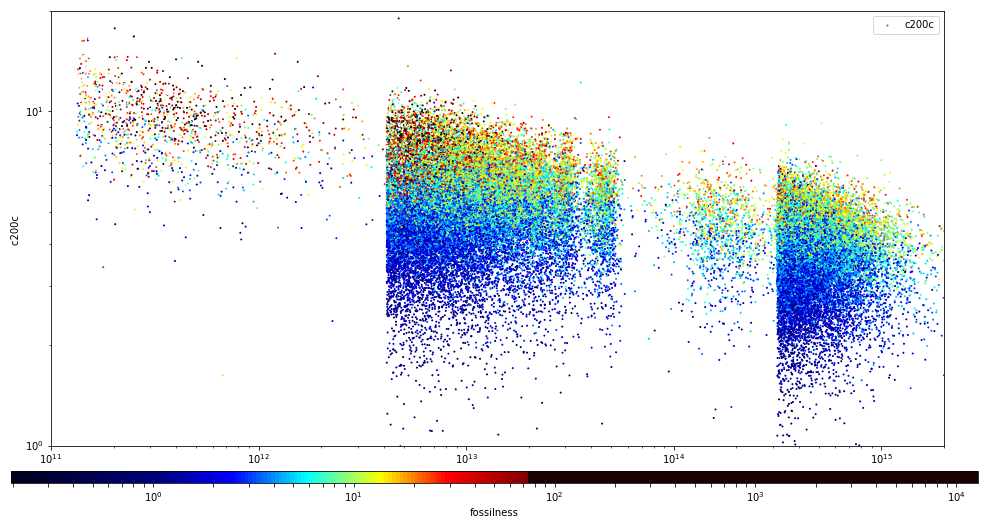

In [92]:
fig,a = plt.subplots(1,1, figsize=(16,8))
df=all_df_z0#.sample(n=100000)
colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
scatter = a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, c= df.fossilness, s=1, cmap=colormap, norm=norm) #c=rdf.redshift, s=2)



cbar_ax = fig.add_axes([0.09, 0.06, 0.84, 0.02])
fig.colorbar(scatter, label="fossilness",cax=cbar_ax,  orientation='horizontal')
set_Mc_lims(a)

In [108]:
from IPython.display import display

display(all_df_z0[all_df_z0.id_cluster==1])

display(all_df_z0.__dict__)

rsfac = 0.46556
NFW = lambda r,rho0,rs: rho0/((r/rs)*(1.+r/rs)**2.)


,id,i_file,id_cluster,i_in_file,fsub,ncon,gpos0,gpos1,gpos2,goff,...,virialness_eta,virialness_beta,snap_id,resolvness,id,name,redshift,a,simulation_id,tag
1,811840,0,1,1,1093.0,0.0,456582.84375,220605.140625,279066.125,5280553.0,...,None,None,6,1,6,031,0.252089,0.798665,2,z0


{'_is_copy': None, '_data': BlockManager
 Items: Index(['id', 'i_file', 'id_cluster', 'i_in_file', 'fsub', 'ncon', 'gpos0',
        'gpos1', 'gpos2', 'goff', 'lgas0', 'lgas1', 'lgas2', 'lgas3', 'lgas4',
        'lgas5', 'ygas0', 'ygas1', 'ygas2', 'ygas3', 'ygas4', 'ygas5', 'tgas0',
        'tgas1', 'tgas2', 'tgas3', 'tgas4', 'tgas5', 'mstr0', 'mstr1', 'mstr2',
        'mstr3', 'mstr4', 'mstr5', 'start_subfind_file', 'end_subfind_file',
        'rcri', 'm200', 'r200', 'mcon', 'rcon', 'm500', 'r500', 'm5cc', 'r5cc',
        'mtot', 'rtot', 'mvir', 'rvir', 'm25k', 'r25k', 'glen', 'nsub', 'bgpo0',
        'bgpo1', 'bgpo2', 'bgma', 'mgas0', 'mgas1', 'mgas2', 'mgas3', 'mgas4',
        'mgas5', 'mgas6', 'bgra', 'mcri', 'c200c', 'fossilness_mcent',
        'fossilness_msat', 'fossilness', 'virialness_w', 'virialness_es',
        'virialness_k', 'virialness_w_gas', 'virialness_es_gas',
        'virialness_k_gas', 'virialness_eta', 'virialness_beta', 'snap_id',
        'resolvness', 'id', 'name'

In [ ]:
xdf = simul ("""
select fof.id_cluster,fof.mcri from fof 
inner join galaxy on galaxy.id_cluster = fof.id_cluster and galaxy.snap_id = fof.snap_id
 where   galaxy.snap_id = 1 and fof.snap_id = 1 and
 fof.mcri>.7e15/1e10 and
  galaxy.msub>fof.mcri*0.1

""")




In [ ]:
def counts(df, n):
    ids, counts = np.unique(df.id_cluster,return_counts =True)
    count = len(ids[counts>=n])
    print("FoF groups with %.2e < Mcri/h < %.2e and with %d massive galaxies: %d "%(np.min(df.mcri)*1e10, np.max(df.mcri)*1e10, n, count))

counts(xdf, 3)
counts(xdf, 4)
counts(xdf, 5)